# **Выполнение проекта по ПП "Реализация проектов в сфере DS"**
**Задача регрессии.**

Импортируем необходимые библиотеки.

In [266]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import warnings

from matplotlib import pyplot as plt

Добавим фильтры на игнорирование лишних предупреждений при выводе

In [267]:
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = FutureWarning)
plt.rcParams['figure.dpi'] = 400
plt.style.use("seaborn-v0_8-deep")
%matplotlib inline

In [268]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## **1. EDA и RESEARCH Анализ**

Выполним выгрузку данных из .csv файла

In [269]:
data = pd.read_csv("dataset.csv")

Выведем главную сводку по содержанию датасета

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Выведем первые элементы датасета

In [271]:
data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

Рассмотрим содержащиеся данные:
- ***Unnamed: 0*** — идентификатор записи;
- ***track_id*** — идентификатор трека;
- ***artist*** — артист;
- ***album_name*** — название альбома;
- ***track_name*** — название записи;
- ***popularity*** — значения в диапазоне от 0 до 100 отражающее популярность песни;
- ***duration_ms*** — длительность трека(мс);
- ***explicit*** — ненормативная лексика;
- ***danceability*** — значение в диапазоне от 0 до 1 отражающее насколько песня подходит для танцев;
- ***energy*** — значение в диапазоне от 0 до 1 отражающее меру энергичности трека;
- ***key*** — общая тональность произведения;
- ***loudness*** — общая громность трека в дБ;
- ***mode*** — указывается лад;
- ***speechiness*** — определяет наличие произнесённых слов в треке от 0 до 1;
- ***acousticness*** — является ли трек акустическим от 0 до 1;
- ***instrumentalness*** — содержит ли трек вокальные партии;
- ***liveness*** — отражает живую запись;
- ***valence*** — позитивность трека;
- ***tempo*** — темп трека BPM;
- ***time_signature*** — знак нотации, характеризующий число ритмических единиц в такте;
- ***track_genre*** — жанр трека.

Исходя из этого удалим колонки *Unnamed* и *track_id* так как они просто выступают некими индексаторами.

In [272]:
data = data.drop(columns=["Unnamed: 0", "track_id"])

Проверим на Null Values

In [273]:
data.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Такие записи были найдены, просто отчистим их, чтобы не получить ошибок в дальнейшем (учитывая, что при проверке выяснилось, что это 1 запись)

In [274]:
data.dropna(inplace=True)

Теперь проверим данные на наличие дубликатов

In [275]:
data.duplicated().sum()

577

Было найдено всего 577 дублирующих записей, их тоже почистим.

In [276]:
data.drop_duplicates(inplace=True)

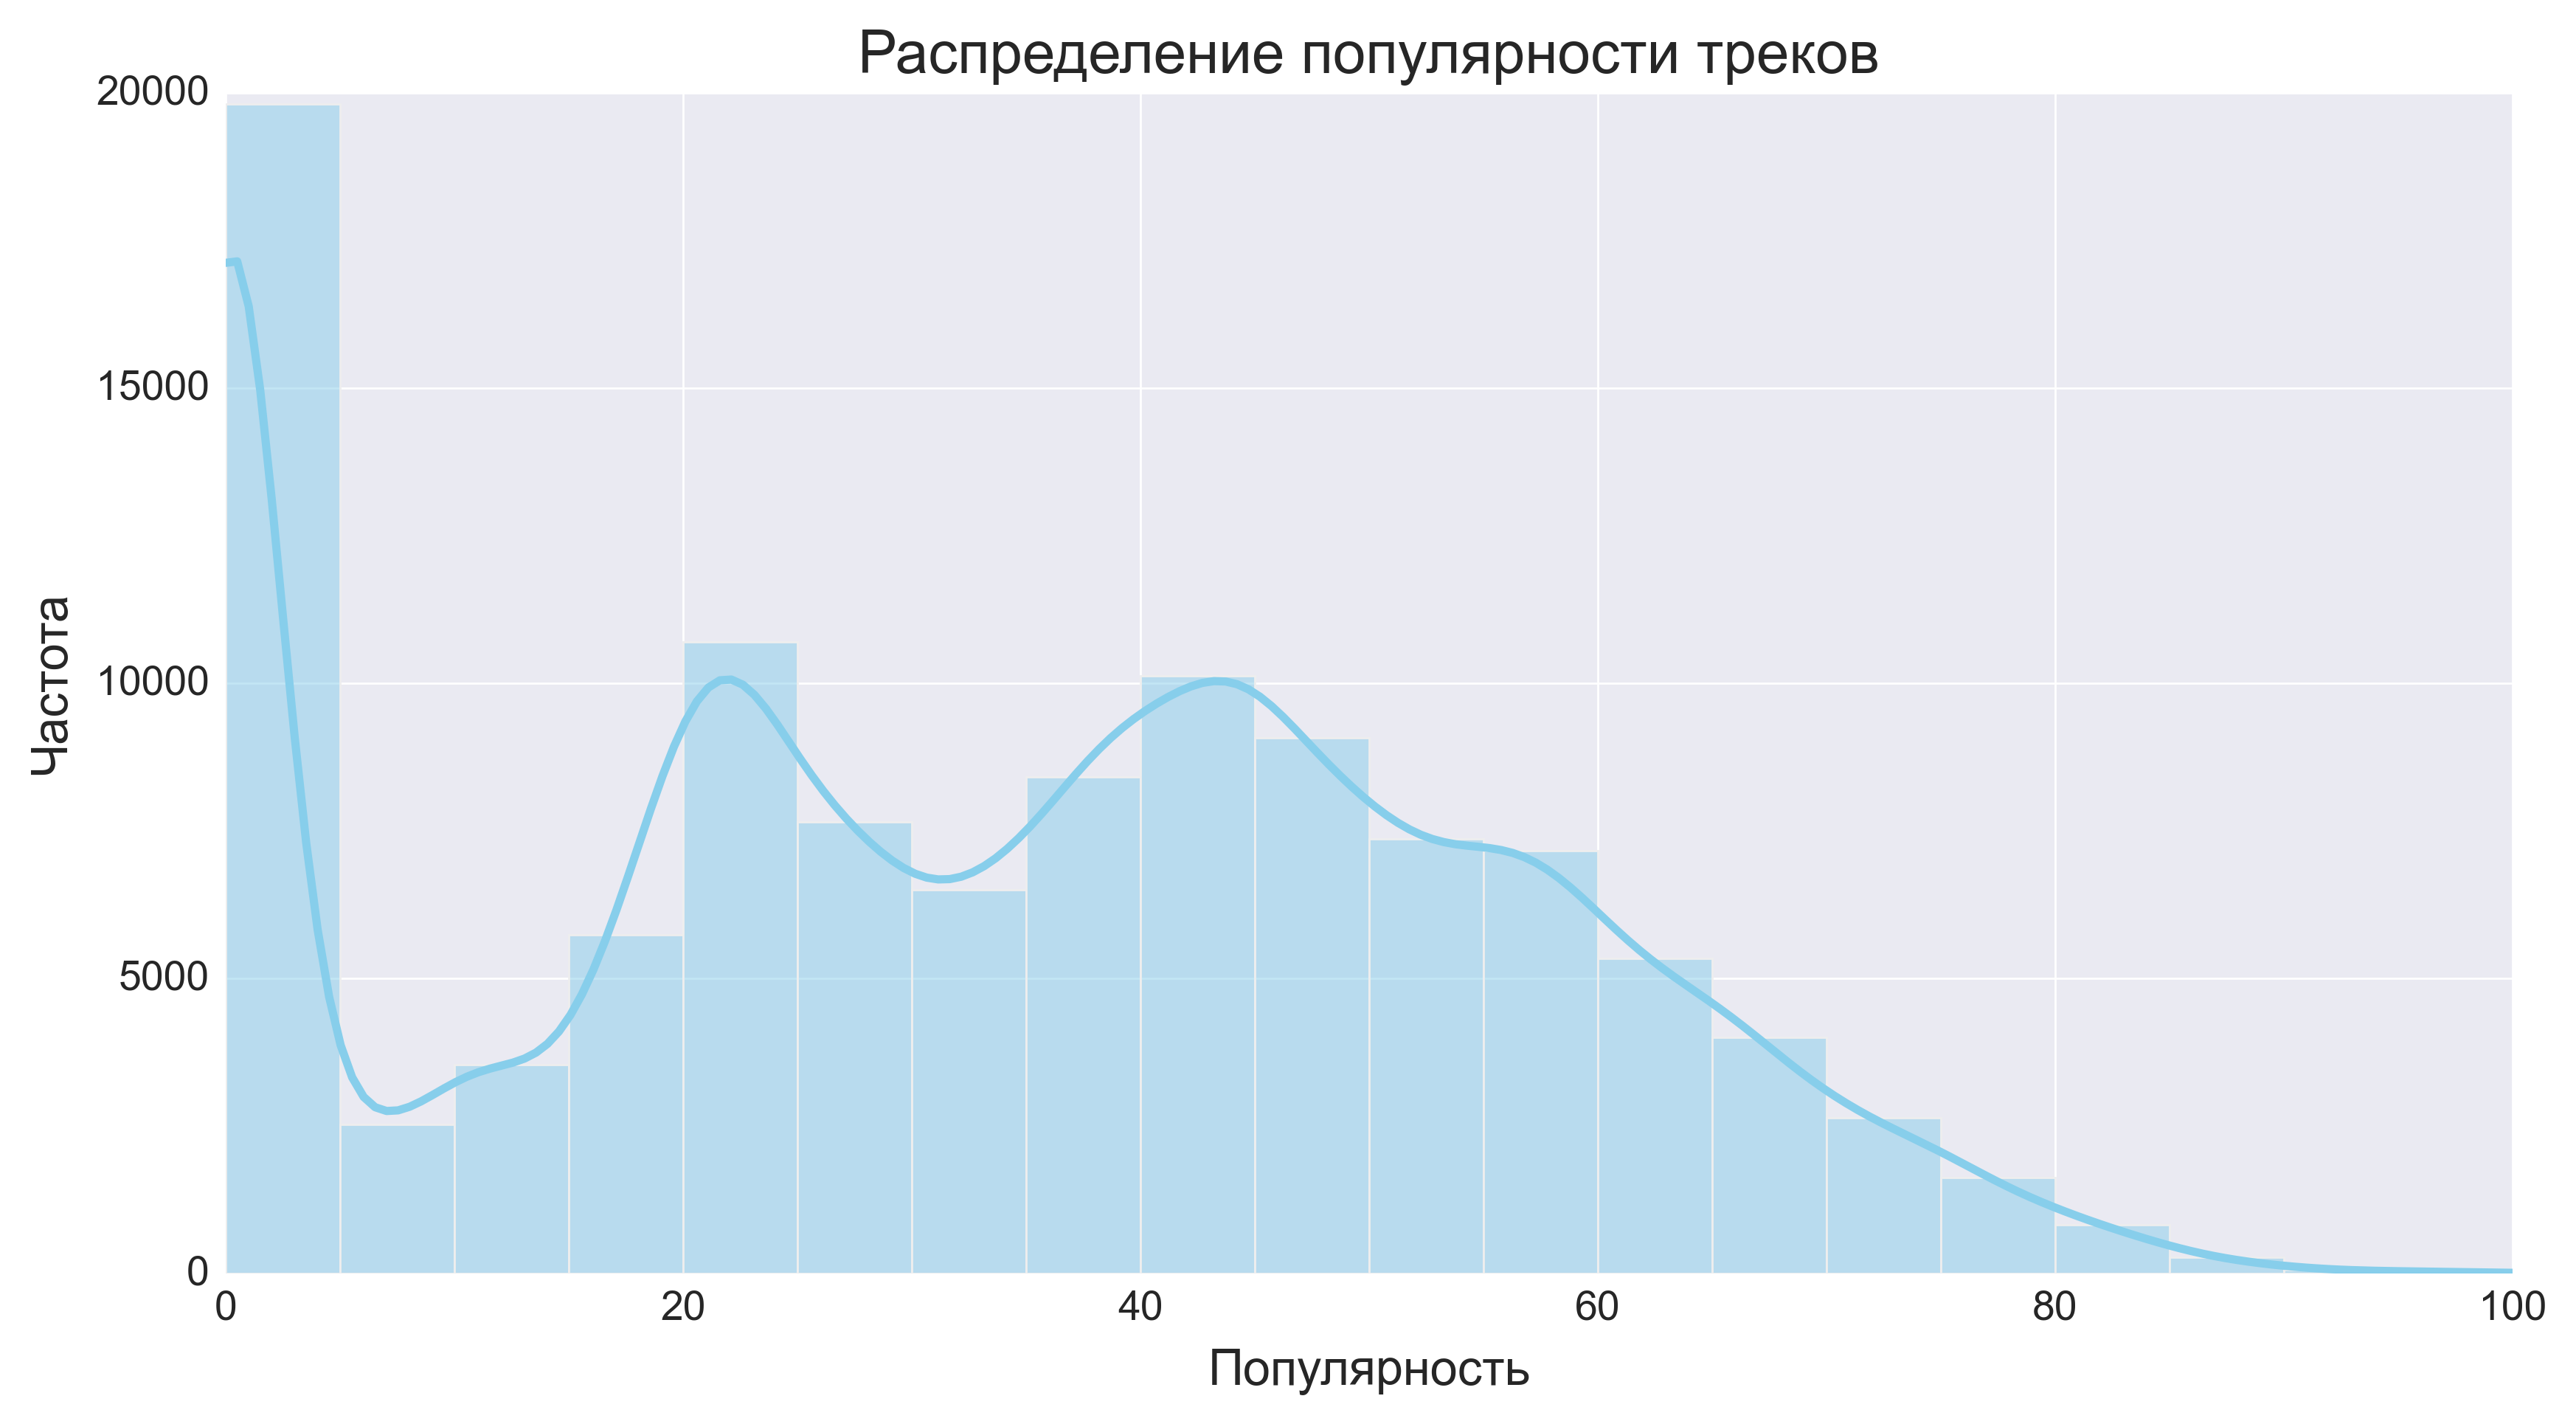

In [277]:
plt.figure(figsize=(10, 5))
sns.histplot(data['popularity'], bins=20, kde=True, color="skyblue")
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

### **Визуализация**
Нарисуем график распределения количества песен от длительности(мин)

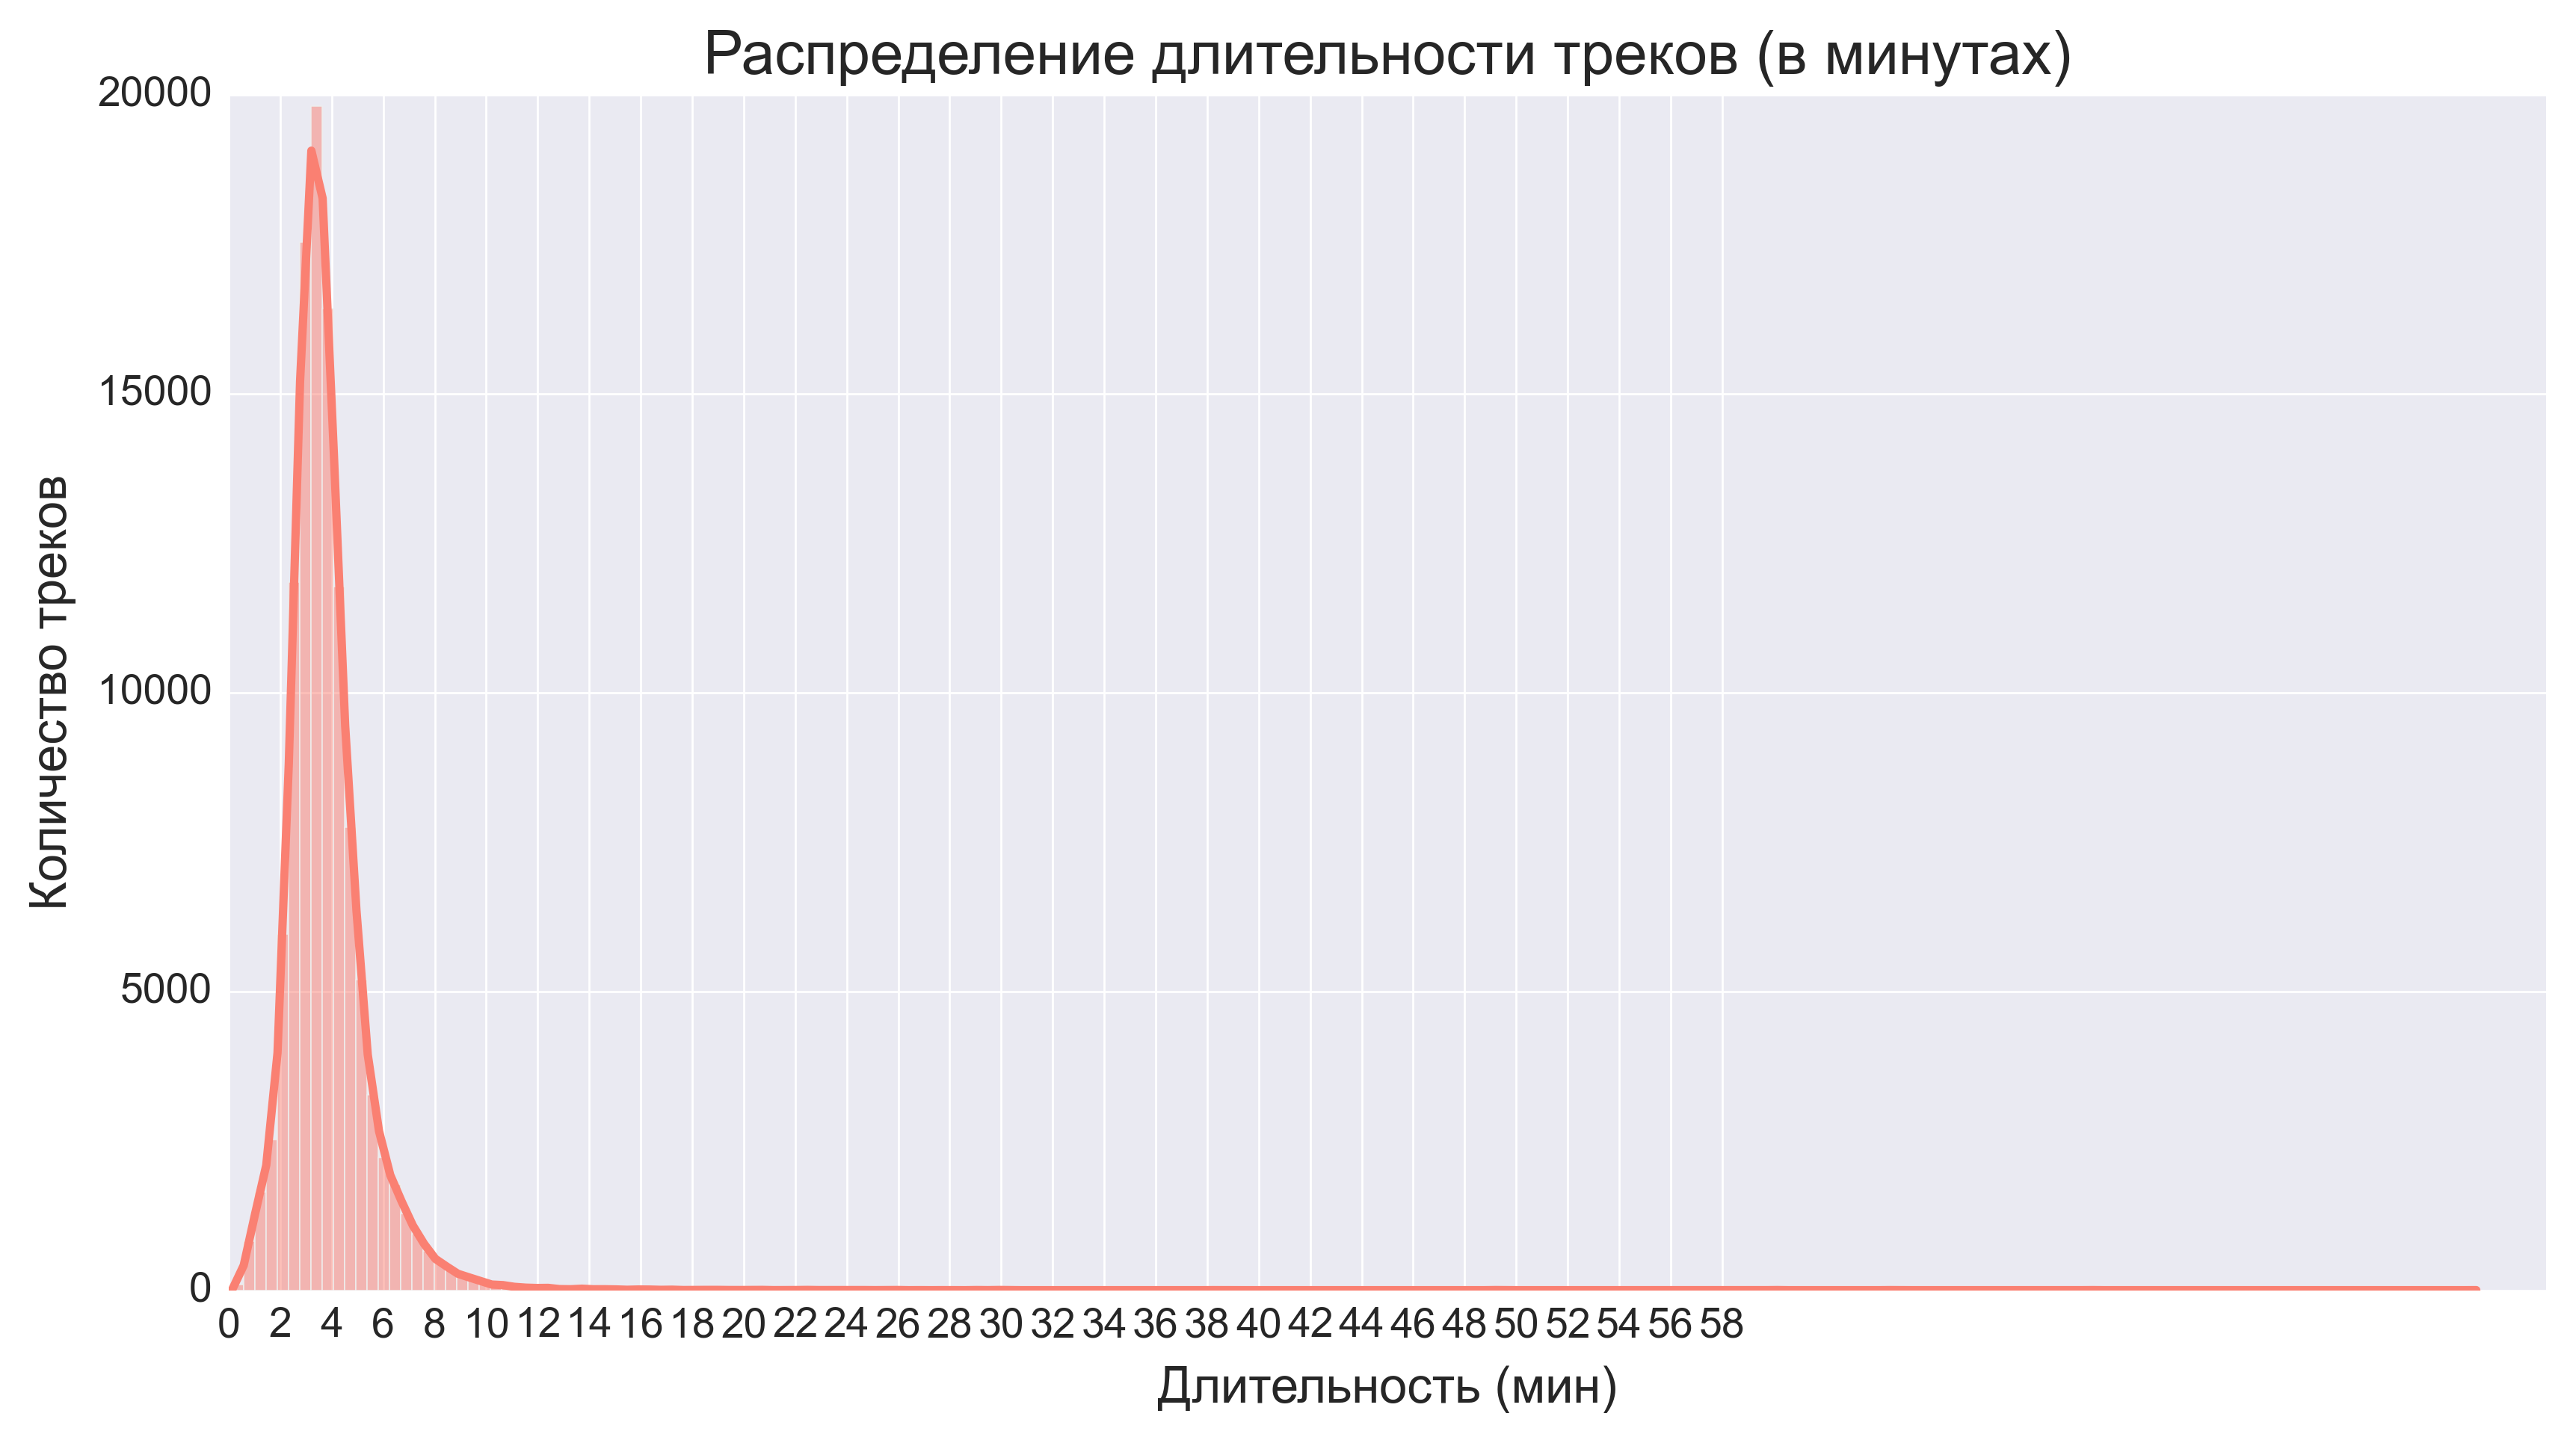

In [278]:
plt.figure(figsize=(10, 5))
sns.histplot(data['duration_ms'] / 60000, bins=200, kde=True, color="salmon")  # Длительность в минутах
plt.title('Распределение длительности треков (в минутах)')
plt.xlabel('Длительность (мин)')
plt.ylabel('Количество треков')
plt.xticks(range(0, 60, 2))
plt.show()

**Вывод:** *для большинства треков длительность составляет от 2 до 4-х минут. Что в принципе является закономерным для песен.*

Построим график для выявления наиболее популярных жанров.

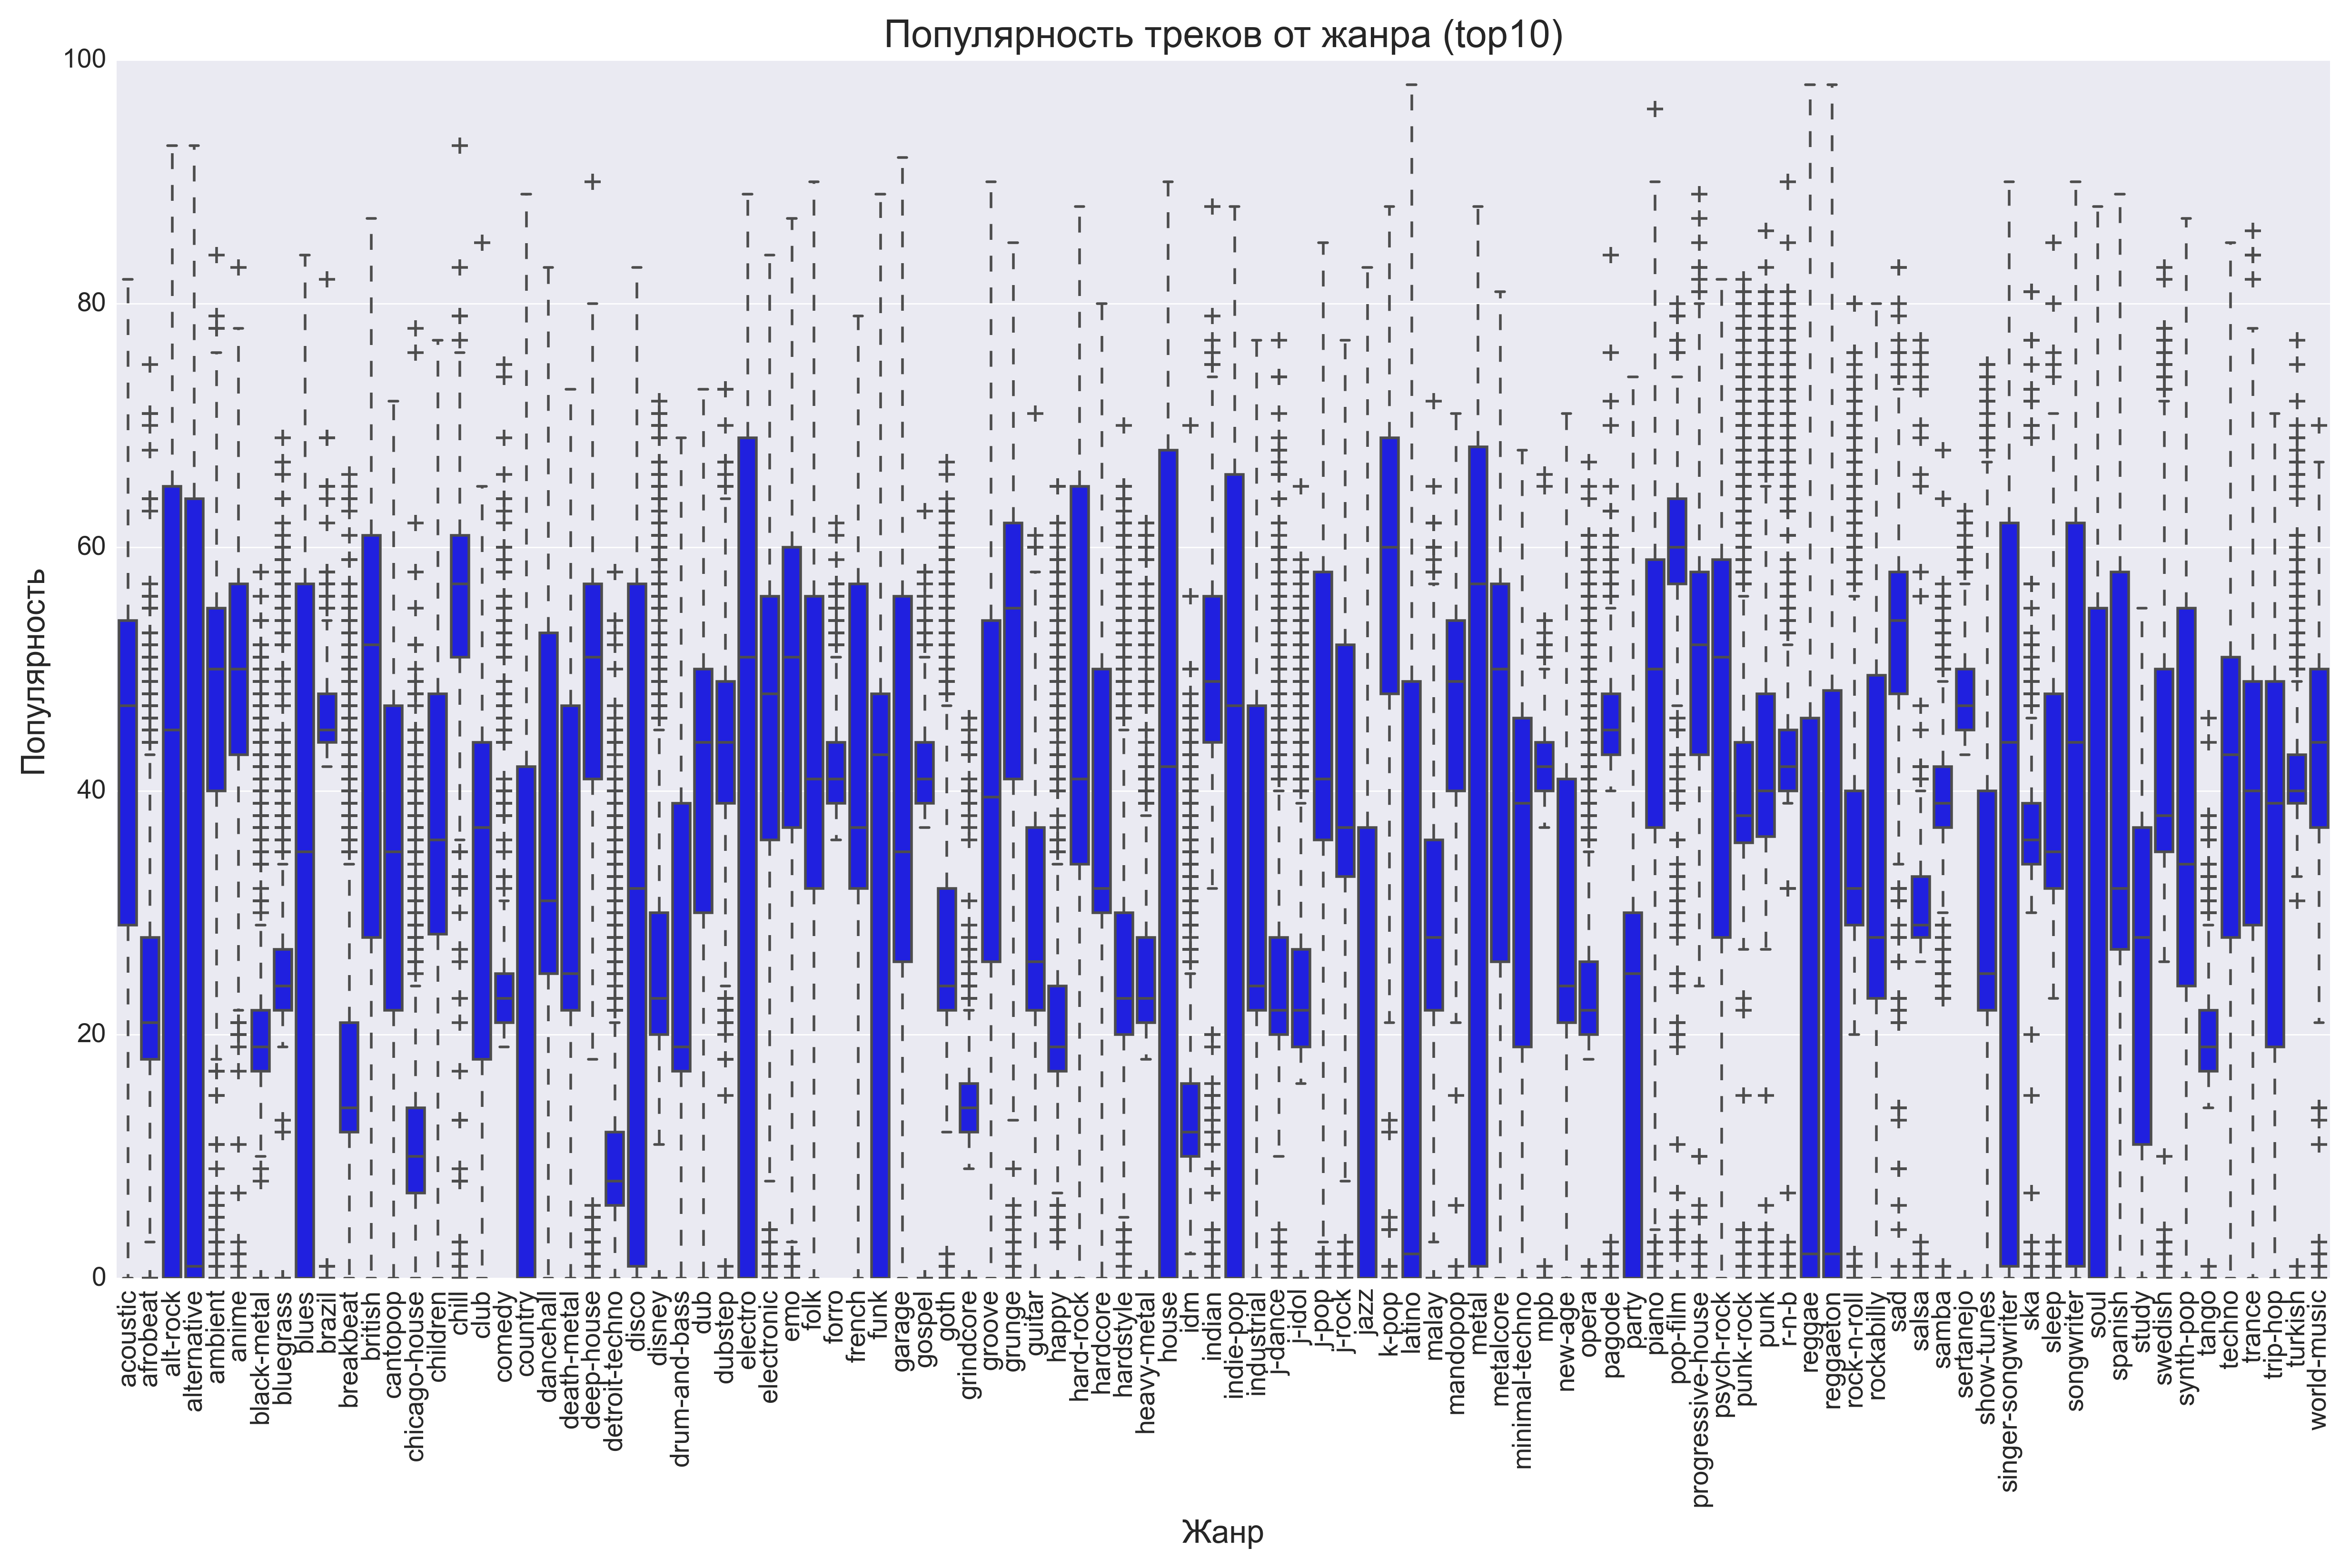

In [ ]:
top_geners = data["track_genre"].value_counts().head(100).index


plt.figure(figsize=(15, 8))
sns.boxplot(x="track_genre", y="popularity", color="blue", data=data[data['track_genre'].isin(top_geners)])
plt.xticks(rotation=90)
plt.xlabel("Жанр")
plt.ylabel("Популярность")
plt.title('Популярность треков от жанра')
plt.show()

**Вывод:** *наиболее популярными являются k-pop и pop-film по медианому значению.*

Построим распределение для зависимости популярности от танцевальности песни.

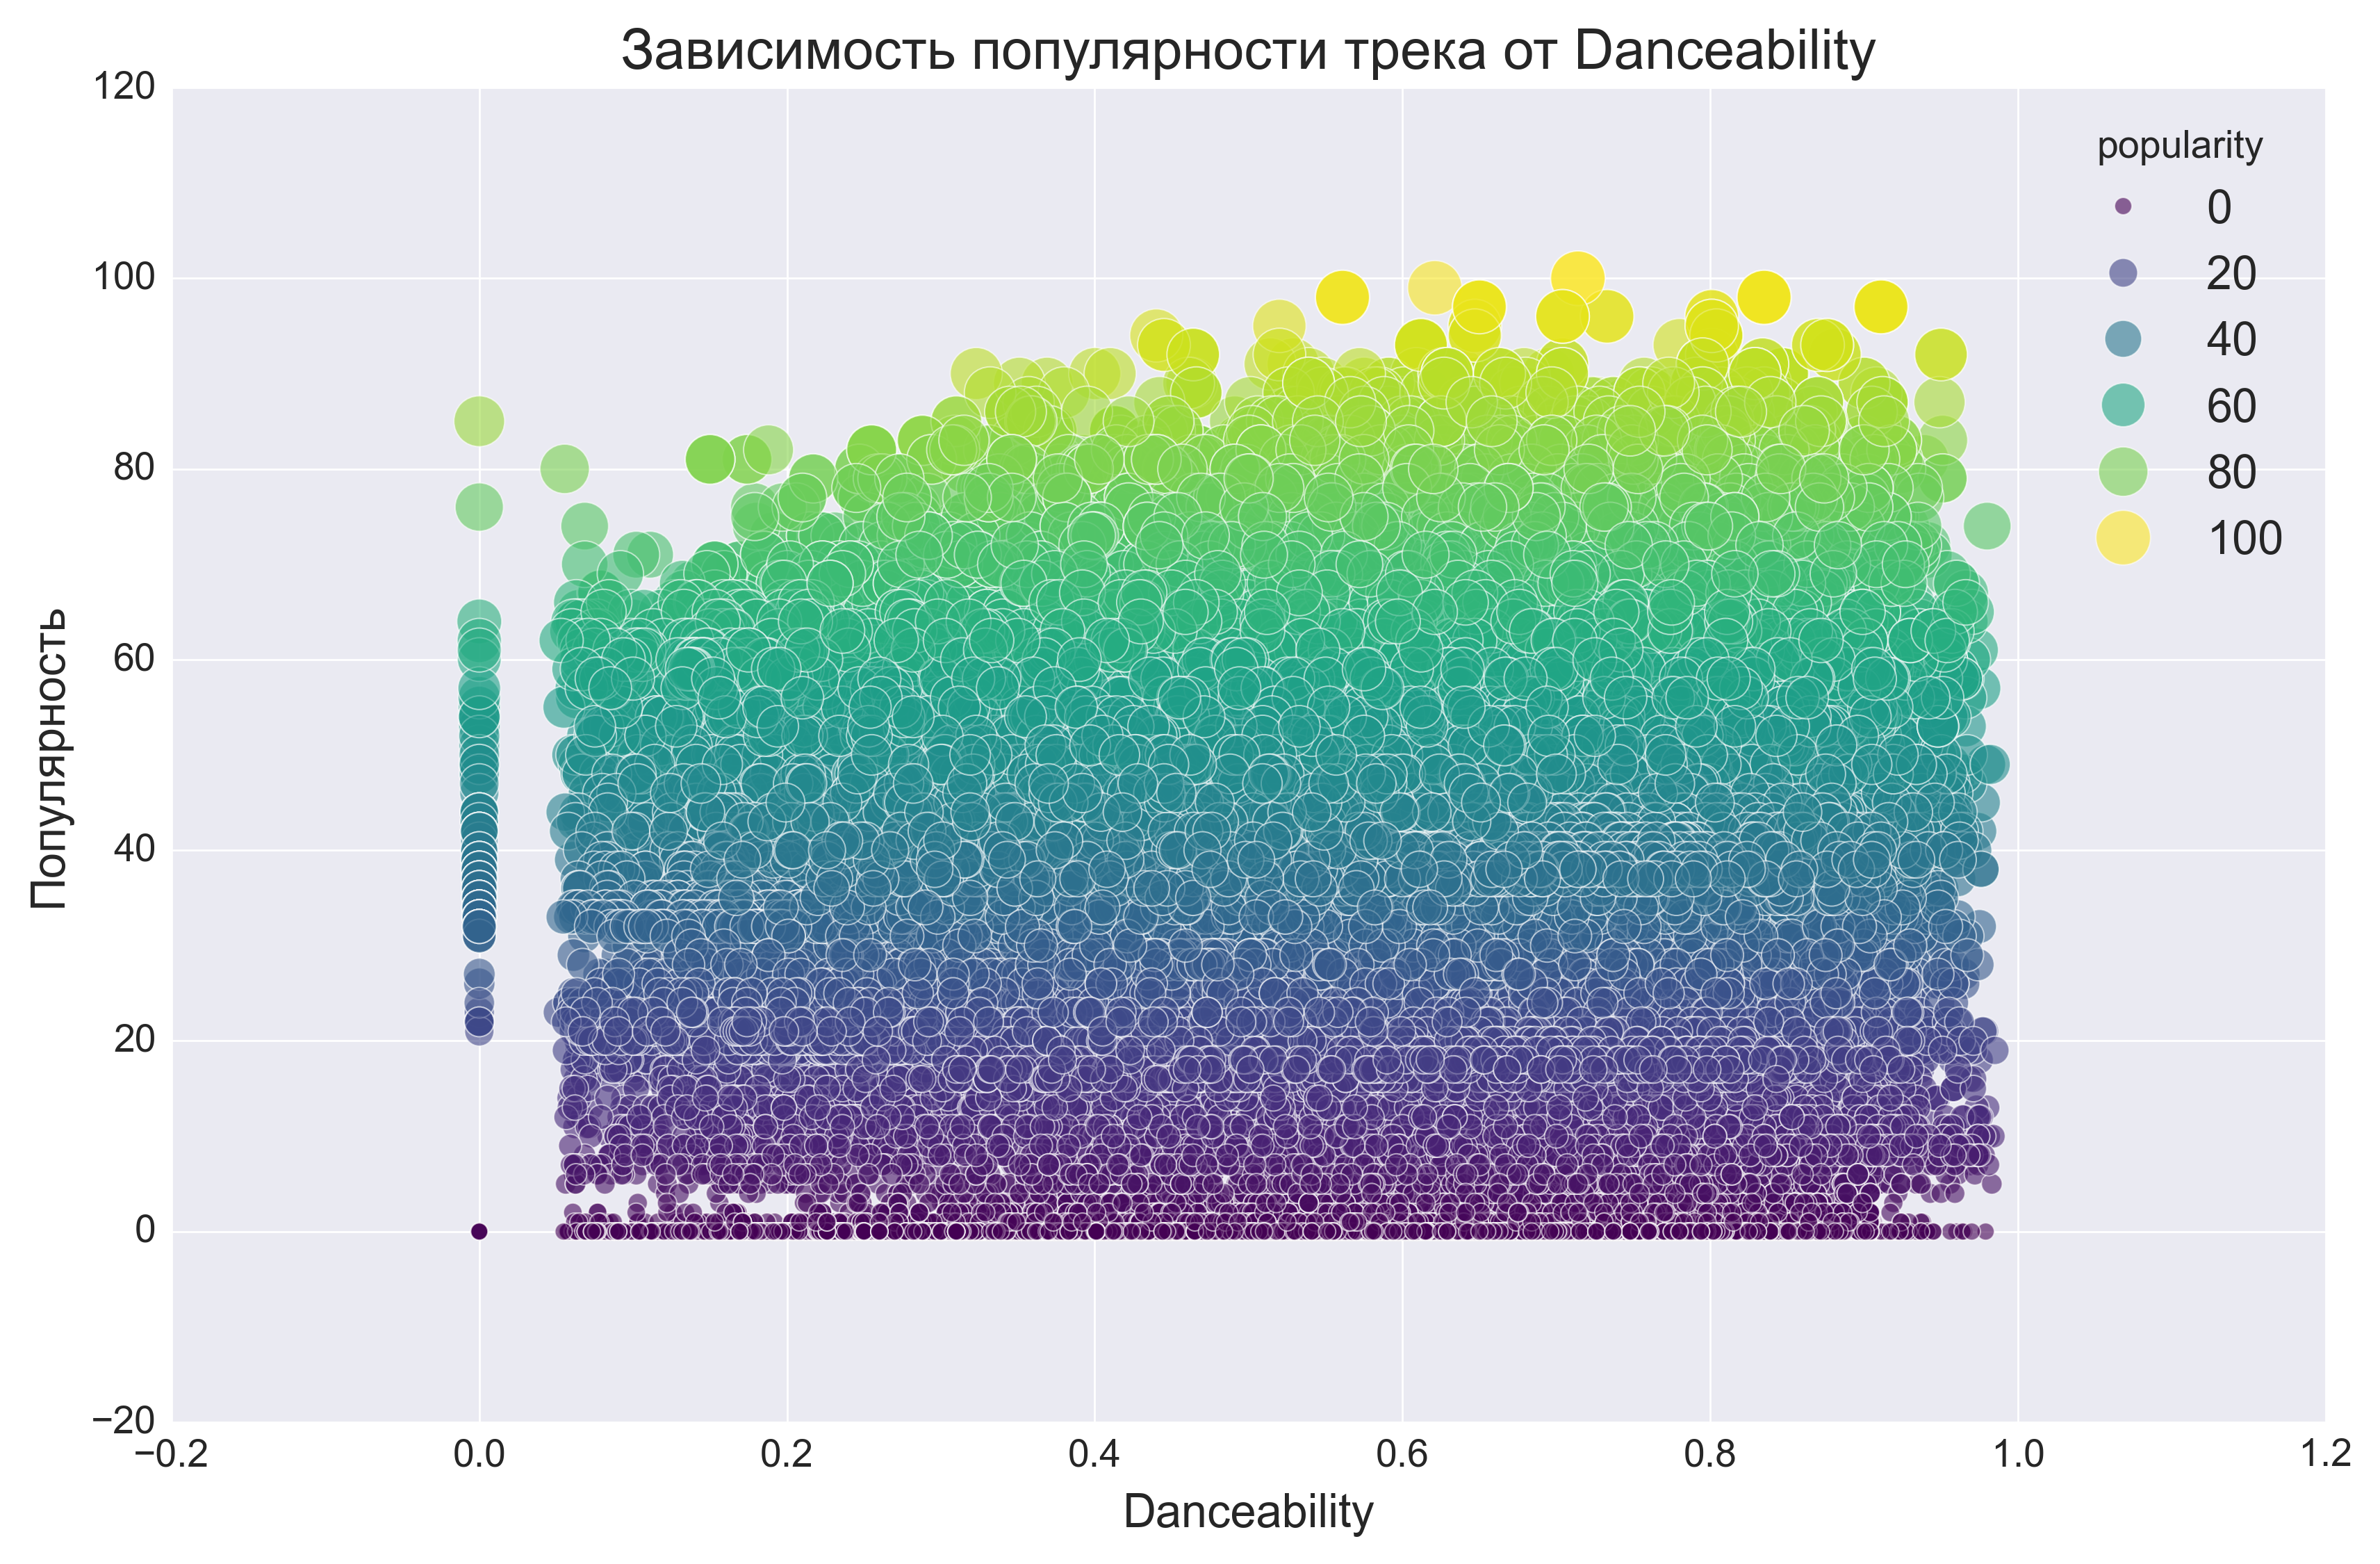

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='danceability', y='popularity', hue='popularity', palette='viridis', size='popularity', sizes=(20, 200), alpha=0.6)

plt.title('Зависимость популярности трека от Danceability')
plt.xlabel('Danceability')
plt.ylabel('Популярность')
plt.show()

**Вывод:** *Сложно сдлеать какой то особенный вывод помимо того, что самые популярные треки имеют не менее 0.5 по признаку танцевальности*

Также проверим, как использование ненормативной лексики влияет на популятность трека.

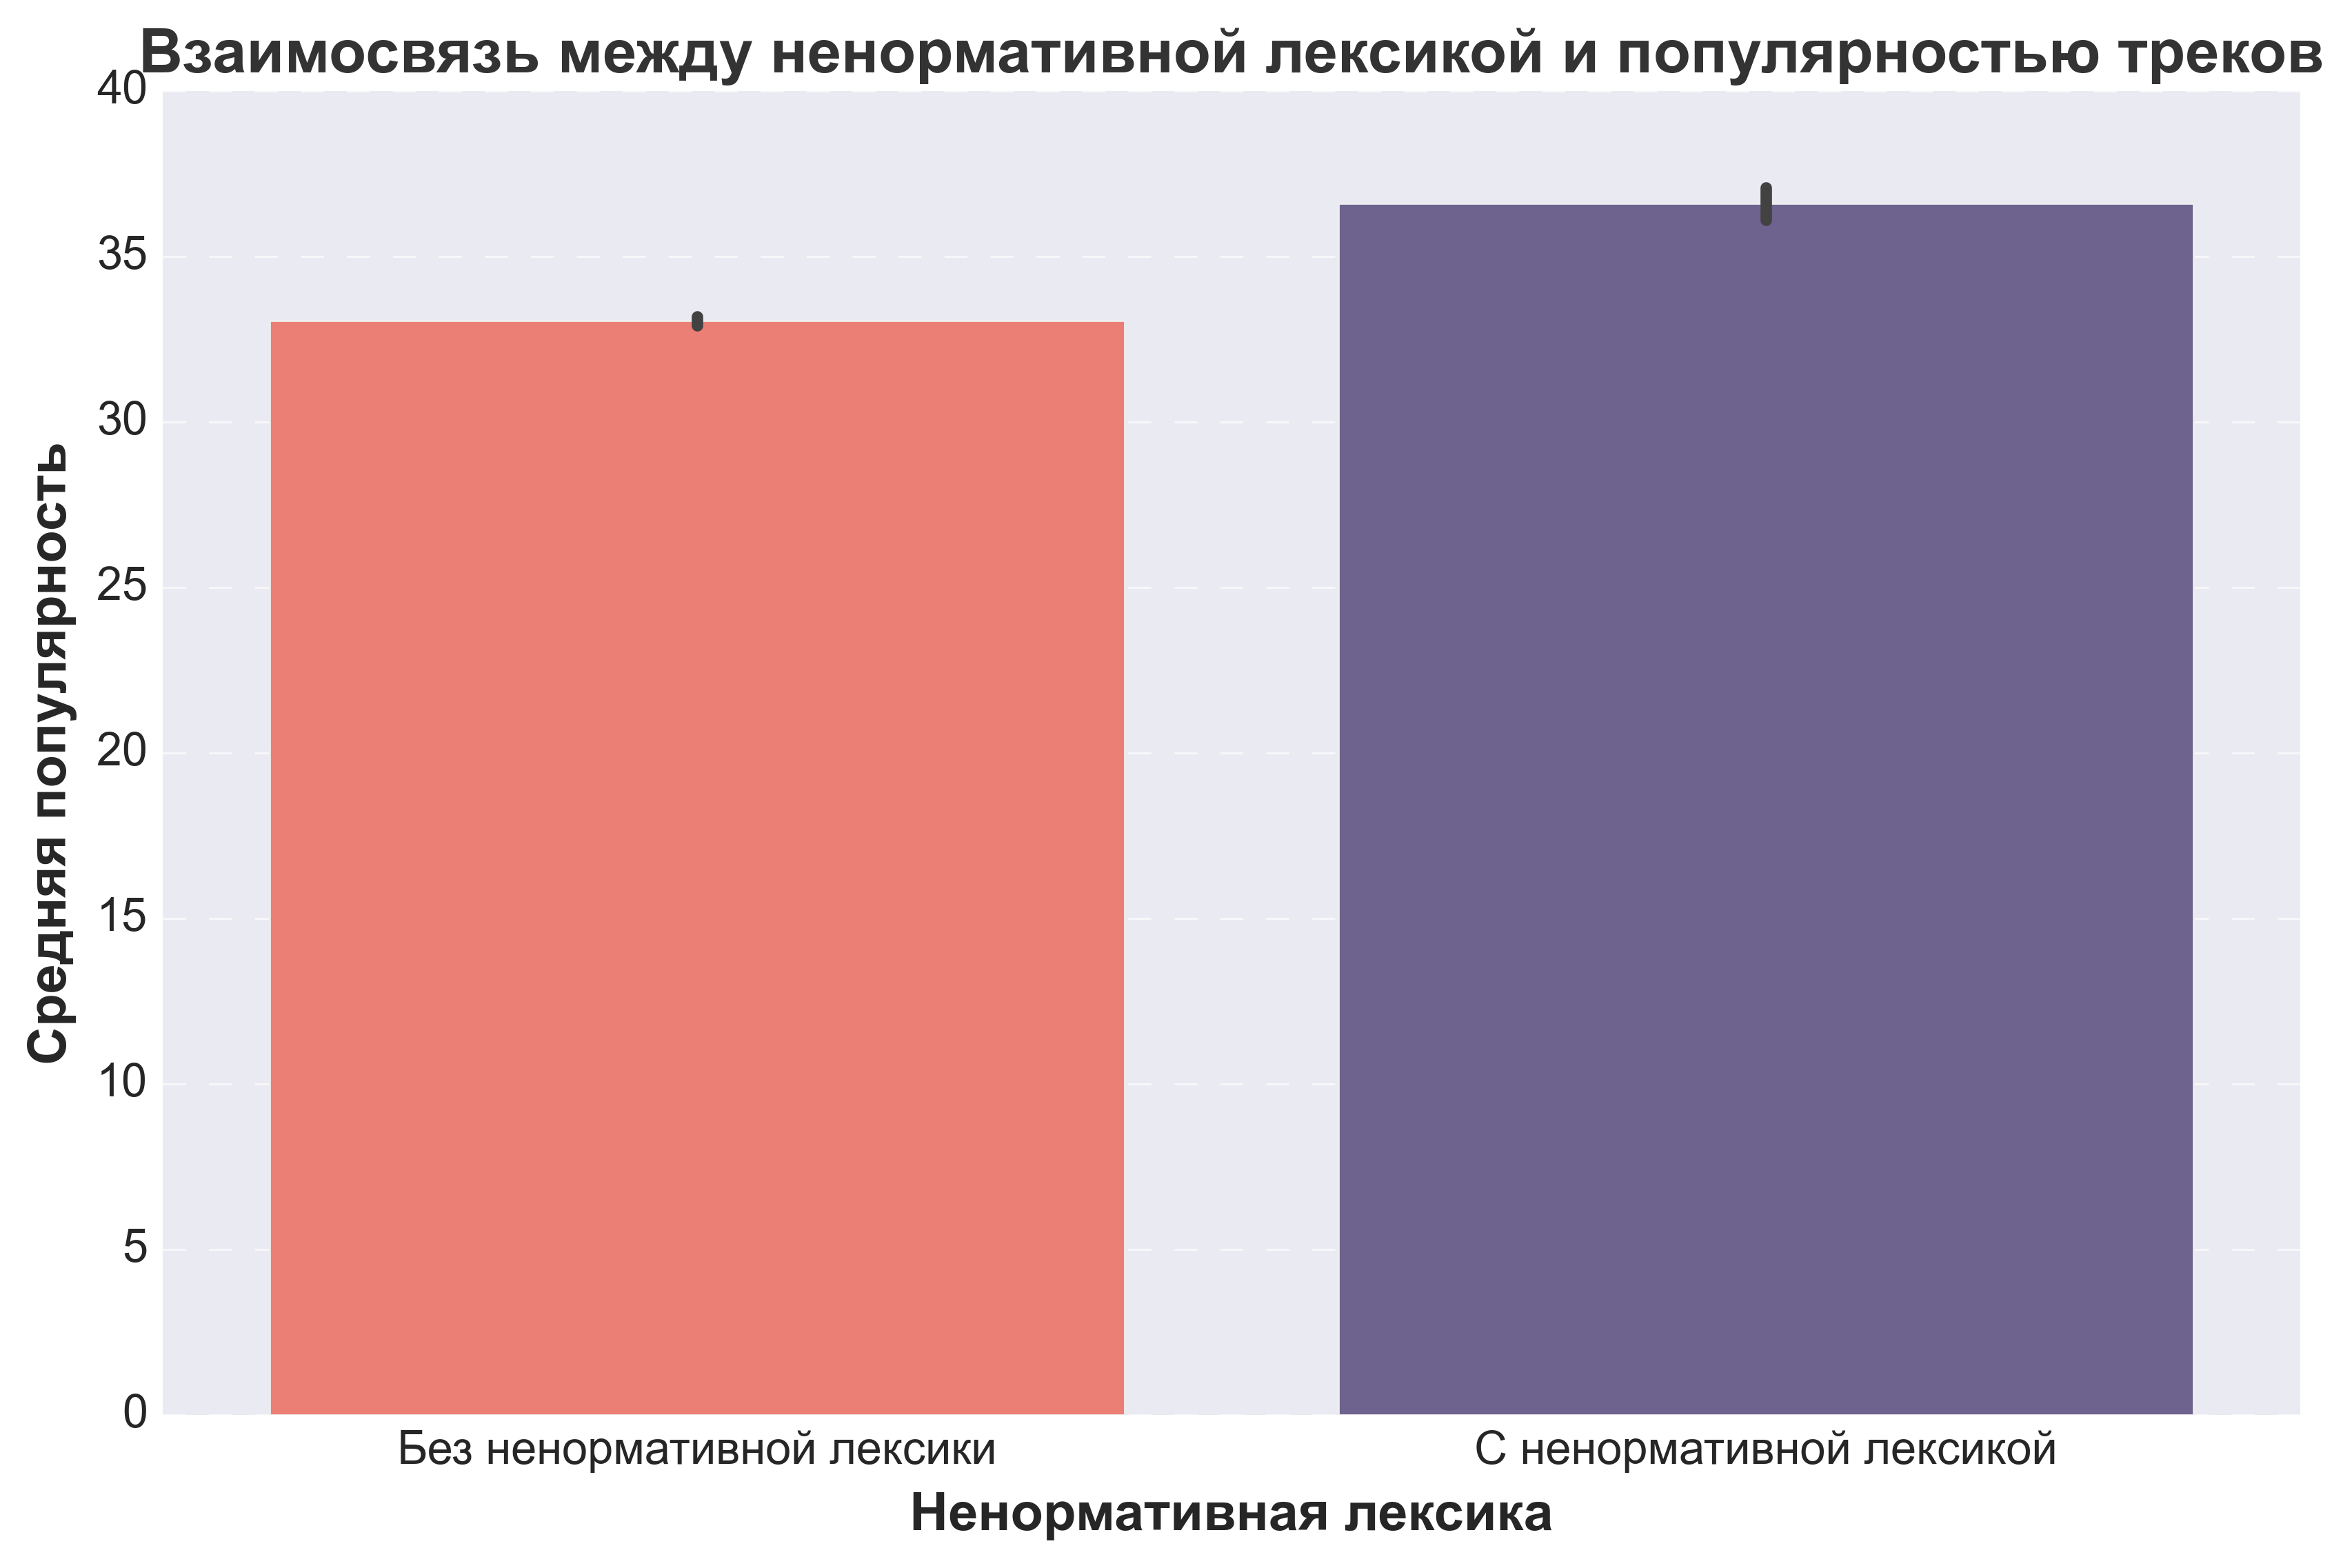

In [284]:
plt.figure(figsize=(10, 6))
sns.barplot(x='explicit', y='popularity', data=data, palette=['#FF6F61', '#6B5B95'])
plt.title('Взаимосвязь между ненормативной лексикой и популярностью треков', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Ненормативная лексика', fontsize=14, fontweight='semibold')
plt.ylabel('Средняя популярность', fontsize=14, fontweight='semibold')
plt.xticks([0, 1], ['Без ненормативной лексики', 'С ненормативной лексикой'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Вывод:** *Можно точно сказать, что использование ненормативной лексики напрямую не влияет на популярность*

Также проверим, как использование ненормативной лексики влияет на популятность трека.